In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
# from pandas_profiling import ProfileReport # DEPRECATED
#from ydata_profiling import ProfileReport

from IPython.display import display
sns.set(style="white", color_codes=True)
labelencoder=LabelEncoder()

In [ ]:
df = pd.read_csv("/content/completeData.csv")

In [ ]:
df=df.drop('Unnamed: 7', axis=1)
df=df.drop('Unnamed: 8', axis=1)
# df=df.drop('N', axis=1)
# df=df.drop('P', axis=1)
# df=df.drop('K', axis=1)

missing  values

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
Labelling      1
dtype: int64

In [ ]:
df.dropna(subset=['Labelling'],how='any',inplace=True) #drop all rows with null column name do this if a specific column has small null values
df['Labelling'].isnull().sum()

0

Text(0.5, 1.0, 'Samples per Class')

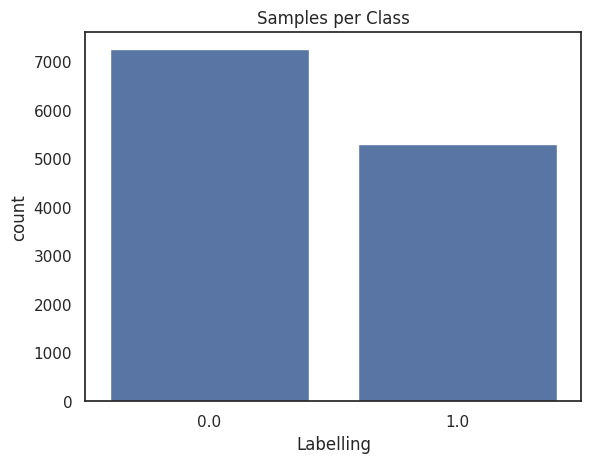

In [ ]:
sns.countplot(df, x="Labelling")
plt.title('Samples per Class')

For Balancing

In [ ]:
counts = df['Labelling'].value_counts()
num_samples = min(counts)

In [ ]:
df_balanced = pd.DataFrame()
# Iterate through classes and downsample
for c in df['Labelling'].unique():
    df_class = df[df['Labelling'] == c]
    df_class_balanced = resample(df_class,
                                 replace=False,
                                 n_samples=num_samples,
                                 random_state=42)
    df_balanced = pd.concat([df_balanced, df_class_balanced])

print(df_balanced['Labelling'].value_counts())

Labelling
0.0    5300
1.0    5300
Name: count, dtype: int64


Text(0.5, 1.0, 'Samples per Class')

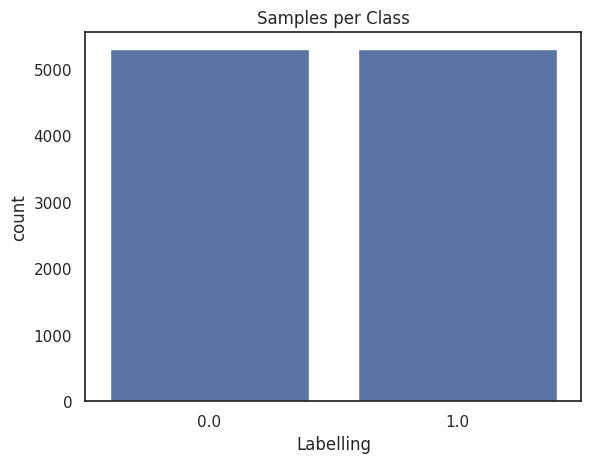

In [ ]:
sns.countplot(df_balanced, x="Labelling")
plt.title('Samples per Class')

Split

In [ ]:
X=df_balanced.drop(['Labelling'],axis=1)
Y=df_balanced['Labelling']


Test Train

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=50)

scaling

In [ ]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Classifers

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score#
from joblib import dump, load
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=300),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}


best_rmse = float("inf")
best_accuracy = 0
best_model = None

for name, model in models.items():

    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, predictions))

    accuracy = accuracy_score(Y_test, predictions)

    print(f'{name} - RMSE: {rmse:.3f}, Accuracy: {accuracy:.3f}')
    dump(model, f'{name}_model.joblib')
    if (rmse < best_rmse) and (accuracy > best_accuracy):
        best_rmse = rmse
        best_accuracy = accuracy
        best_model = model

print(f'Best model: {best_model}')
print(f'RMSE: {best_rmse:.3f}')
print(f'Accuracy: {best_accuracy:.3f}')

SVM - RMSE: 0.000, Accuracy: 1.000
Random Forest - RMSE: 0.022, Accuracy: 1.000
XGBoost - RMSE: 0.022, Accuracy: 1.000
Logistic Regression - RMSE: 0.000, Accuracy: 1.000
KNN - RMSE: 0.000, Accuracy: 1.000
Naive Bayes - RMSE: 0.000, Accuracy: 1.000
Decision Tree - RMSE: 0.022, Accuracy: 1.000
Best model: SVC()
RMSE: 0.000
Accuracy: 1.000


## CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load data
df = pd.read_csv('/content/completeData.csv')
df=df.drop('Unnamed: 7', axis=1)
df=df.drop('Unnamed: 8', axis=1)
# Split features and target
X = df.loc[:, ['N', 'P', 'K', 'temperature', 'humidity', 'ph']]
y = df['Labelling']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape feature data for CNN input
X_train = X_train.values.reshape(-1,1,6,1)
X_test = X_test.values.reshape(-1,1,6,1)

# One hot encode target
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(1,3), activation='relu', input_shape=(1,6,1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
314/314 [==============================] - 2s 3ms/step - loss: 0.7040 - accuracy: 0.8985 - val_loss: 0.0182 - val_accuracy: 0.9968
Epoch 2/10
314/314 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9471 - val_loss: 0.0178 - val_accuracy: 0.9968
Epoch 3/10
314/314 [==============================] - 1s 4ms/step - loss: 0.1003 - accuracy: 0.9555 - val_loss: 0.0090 - val_accuracy: 0.9972
Epoch 4/10
314/314 [==============================] - 1s 5ms/step - loss: 0.0921 - accuracy: 0.9590 - val_loss: 0.0111 - val_accuracy: 0.9980
Epoch 5/10
314/314 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9660 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 6/10
314/314 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9787 - val_loss: 0.0026 - val_accuracy: 0.9988
Epoch 7/10
314/314 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9736 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 

In [ ]:
model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## LSTM

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Load and prepare data
# df = pd.read_csv('/content/completeData.csv')
# df=df.drop('Unnamed: 7', axis=1)
# df=df.drop('Unnamed: 8', axis=1)

# # Create additional features
# df["temp_humidity_ratio"] = df["temperature"] / df["humidity"]

# X = df[["N", "P", "K", "temperature", "humidity", "temp_humidity_ratio"]]
# y = df["Labelling"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # # Reshape data for LSTM
# X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))



In [ ]:
# pipeline = Pipeline([
#     ('std_scalar', StandardScaler())
# ])

# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [ ]:
# # Build LSTM model
# model = Sequential()
# model.add(LSTM(64, activation='relu', return_sequences=True,
#                input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(32, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Train model
# model.fit(X_train, y_train, epochs=10, batch_size=32,
#          validation_data=(X_test, y_test))

In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
  model.save("lstm_model.h5")